# UE Computer Vision | Project : Visual tracking of video objects

**Students:**
- Maria FLORENZA LAMBERTI - maria.florenza-lamberti@imt-atlantique.net
- Dely ARDILA MEDINA - dely.ardila-medina@imt-atlantique.net
- Nhan NGUYEN - nhan.nguyen@imt-atlantique.net

---

## Import Libraries

In [10]:

from imageio.v2 import imread, imwrite, imsave
import numpy as np

import glob
import os
import matplotlib.pyplot as plt


from skimage.segmentation import mark_boundaries


import numpy as np

from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
from skimage import io
from skimage.segmentation import mark_boundaries
import imageio

---

## Data

In [13]:
img_path = 'sequences-test'
flow_path = 'sequences-test/flow'
name = 'cow'

flow_files = sorted(glob.glob(os.path.join(flow_path, name + '*.npy')))
img_ext = 'bmp'
mask_ext = 'png'
img_files = sorted(glob.glob(os.path.join(img_path, name + '*.' + img_ext)))
mask_files = sorted(glob.glob(os.path.join(img_path, name + '*.' + mask_ext)))

im_begin = 1
im_end = len(img_files)

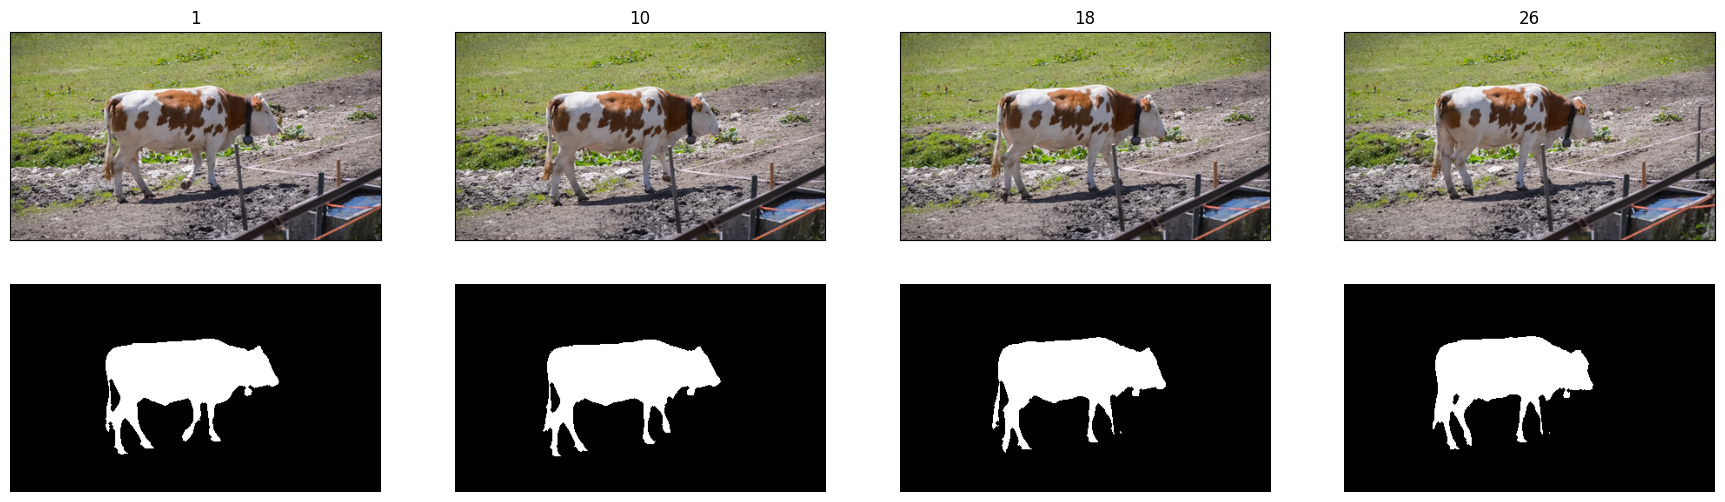

In [14]:
plt.figure(figsize=(22, 6))
for idx, im in enumerate([1,10,18,26]):
    img_current = imread('sequences-test/'+name+'-%0*d.bmp'%(3,im))
    mask_current = imread('sequences-test/'+name+'-%0*d.png'%(3,im))
    plt.subplot(2,4,idx+1), plt.title('%i' %(im)), plt.imshow(img_current), plt.xticks([]), plt.yticks([])
    plt.subplot(2,4,idx+5), plt.imshow(mask_current,cmap='gray'), plt.xticks([]), plt.yticks([])
    plt.axis('off')
plt.show()

---

# Inference and tracking

## Sequential integration

**Inference and Evaluatinon of the results using the sequential approach**

In [ ]:
!python3 run_inference.py --sequences_path sequences-train --model_path flownets_EPE1.951.pth --mode sequential --sequence bear

## Direct Integration

**Inference and Evaluatinon of the results using the sequential approach**

In [ ]:
!python3 run_inference.py --sequences_path sequences-train --model_path flownets_EPE1.951.pth --mode direct --sequence bear

### Run inference for all sequences  
```
python3 all_sequences_inference.py --pretrained /path/to/pretrained/model.pth --mode direct/sequential
```


In [ ]:
!python3 all_sequences_inference.py --pretrained flownets_EPE1.951.pth --mode direct

---

# Results visualization

## Mask result Direct

Visualizing boundaries for sequence: cow


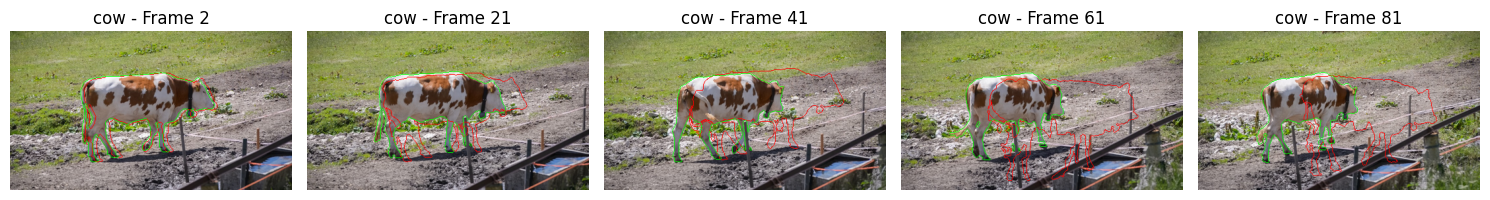

Visualizing boundaries for sequence: fish


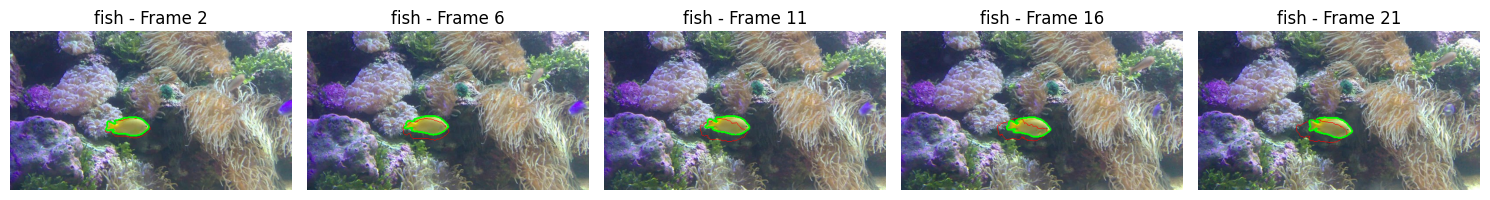

Visualizing boundaries for sequence: octopus


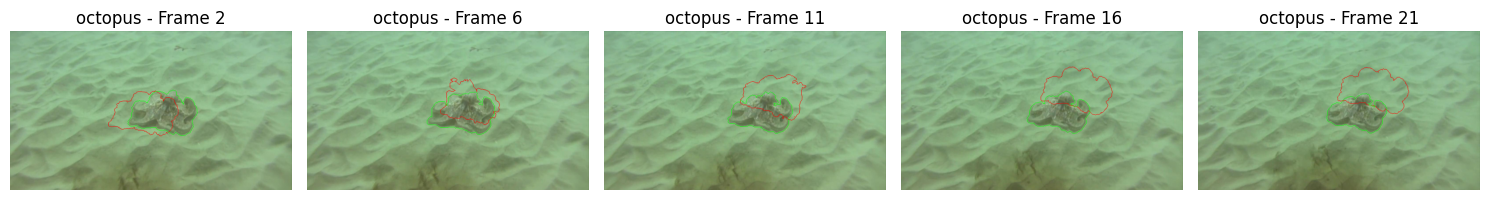

In [27]:
image_folder = 'sequences-test'
mode = 'direct'

sequence_list = ['cow', 'fish', 'octopus']

img_ext = 'bmp'
mask_ext = 'png'

def visualize_boundaries(sequence,mode):
    mask_folder = f'results/{sequence}-mask/{mode}'

    img_files = sorted([f for f in os.listdir(image_folder) if f.startswith(sequence) and f.endswith(img_ext)])
    mask_gt_files = sorted([f for f in os.listdir(image_folder) if f.startswith(sequence) and f.endswith(mask_ext)])
    mask_files = sorted([f for f in os.listdir(mask_folder) if f.startswith(sequence) and f.endswith(mask_ext)])
    num_images = len(img_files)
    # cols = 6
    # rows = math.ceil(num_images / cols)
    plt.figure(figsize=(15, 10))

    if num_images < 30:
        subplot_step = 5
    elif num_images < 60:
        subplot_step = 10
    elif num_images < 90:
        subplot_step = 15
    else:
        subplot_step = 20
    subplot_list = [1,subplot_step,subplot_step*2,subplot_step*3,subplot_step*4, num_images-1]


    for i, (img_file, mask_file, mask_gt_file) in enumerate(zip(img_files, mask_files, mask_gt_files)):
        img_path = os.path.join(image_folder, img_file)
        mask_path = os.path.join(mask_folder, mask_file)

        mask_gt_path = os.path.join(image_folder, mask_gt_file)
        
        img = io.imread(img_path)
        mask = io.imread(mask_path)
        mask_gt = io.imread(mask_gt_path)
        
        img_with_boundaries = mark_boundaries(img, mask, color=(1, 0, 0))
        img_with_gt_boundaries = mark_boundaries(img_with_boundaries, mask_gt, color=(0, 1, 0))

        if i in subplot_list:
            # plt.subplot(rows, cols, i + 1)
            plt.subplot(1,5,i//subplot_step+1)
            plt.imshow(img_with_gt_boundaries)
            plt.title(f'{sequence} - Frame {i + 1}')
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()


# Visualize boundaries for a single sequence
# sequence = 'bear'
# visualize_boundaries(sequence, mode)

# Visualize boundaries for all sequences
for sequence in sequence_list:
    print(f'Visualizing boundaries for sequence: {sequence}')
    visualize_boundaries(sequence, mode)

In [28]:
image_folder = 'sequences-test'
mode = 'direct'
sequence_list = ['cow', 'fish', 'octopus']

img_ext = 'bmp'
mask_ext = 'png'

def create_gif(sequence, mode):
    mask_folder = f'results/{sequence}-mask/{mode}'

    img_files = sorted([f for f in os.listdir(image_folder) if f.startswith(sequence) and f.endswith(img_ext)])
    mask_gt_files = sorted([f for f in os.listdir(image_folder) if f.startswith(sequence) and f.endswith(mask_ext)])
    mask_files = sorted([f for f in os.listdir(mask_folder) if f.startswith(sequence) and f.endswith(mask_ext)])
    # num_images = len(img_files)

    images = [] 
    
    for i, (img_file, mask_file, mask_gt_file) in enumerate(zip(img_files, mask_files, mask_gt_files)):
        img_path = os.path.join(image_folder, img_file)
        mask_path = os.path.join(mask_folder, mask_file)
        mask_gt_path = os.path.join(image_folder, mask_gt_file)
        
        img = io.imread(img_path)
        mask = io.imread(mask_path)
        mask_gt = io.imread(mask_gt_path)
        
        img_with_boundaries = mark_boundaries(img, mask, color=(1, 0, 0))
        img_with_gt_boundaries = mark_boundaries(img_with_boundaries, mask_gt, color=(0, 1, 0))

        images.append((img_with_gt_boundaries * 255).astype('uint8'))

    # Save
    gif_path = 'results/gif'
    os.makedirs(gif_path, exist_ok=True)
    gif_path = f'results/gif/{sequence}.gif'
    imageio.mimsave(gif_path, images, fps=5)
    print(f'GIF saved in: {gif_path}')

# Create GIF for all sequences
for sequence in sequence_list:
    print(f'Generating gif for sequence: {sequence}')
    create_gif(sequence, mode)


Generating gif for sequence: cow
GIF saved in: results/gif/cow.gif
Generating gif for sequence: fish
GIF saved in: results/gif/fish.gif
Generating gif for sequence: octopus
GIF saved in: results/gif/octopus.gif


## Mask Result Sequential

Visualizing boundaries for sequence: cow


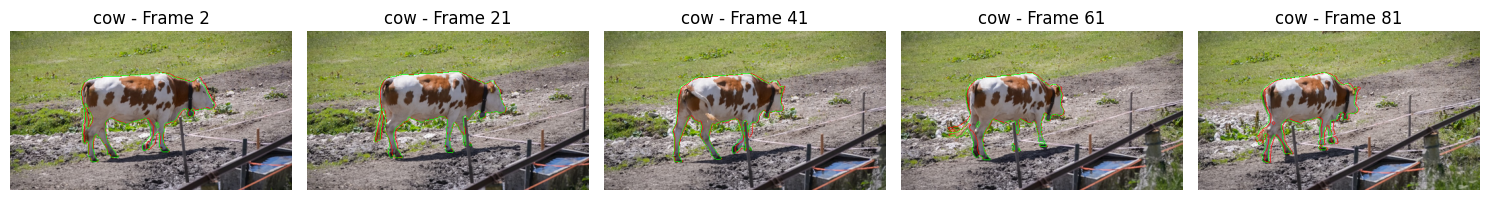

Visualizing boundaries for sequence: fish


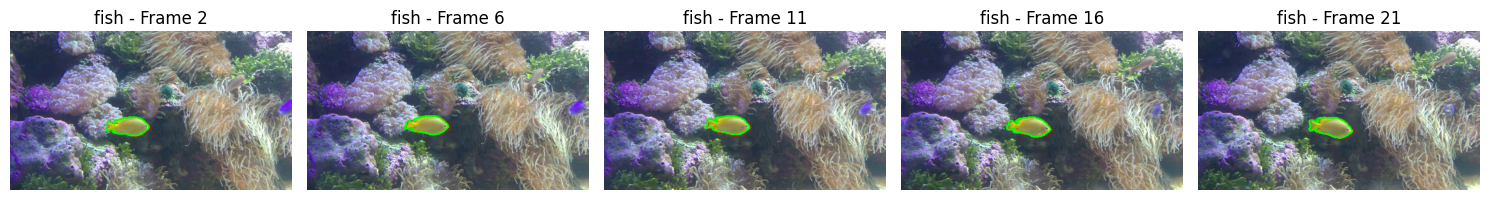

Visualizing boundaries for sequence: octopus


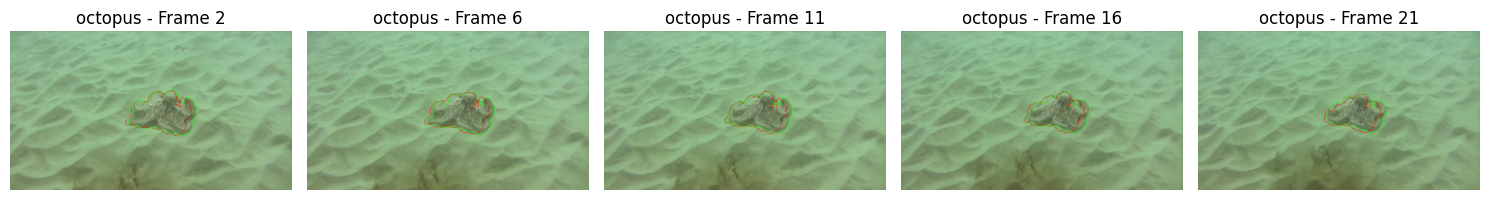

In [34]:
image_folder = 'sequences-test'
mode = 'sequential'

sequence_list = ['cow', 'fish', 'octopus']

img_ext = 'bmp'
mask_ext = 'png'

def visualize_boundaries(sequence,mode):
    mask_folder = f'results/{sequence}-mask/{mode}'

    img_files = sorted([f for f in os.listdir(image_folder) if f.startswith(sequence) and f.endswith(img_ext)])
    mask_gt_files = sorted([f for f in os.listdir(image_folder) if f.startswith(sequence) and f.endswith(mask_ext)])
    mask_files = sorted([f for f in os.listdir(mask_folder) if f.startswith(sequence) and f.endswith(mask_ext)])
    num_images = len(img_files)
    # cols = 6
    # rows = math.ceil(num_images / cols)
    plt.figure(figsize=(15, 10))

    if num_images < 30:
        subplot_step = 5
    elif num_images < 60:
        subplot_step = 10
    elif num_images < 90:
        subplot_step = 15
    else:
        subplot_step = 20
    subplot_list = [1,subplot_step,subplot_step*2,subplot_step*3,subplot_step*4, num_images-1]


    for i, (img_file, mask_file, mask_gt_file) in enumerate(zip(img_files, mask_files, mask_gt_files)):
        img_path = os.path.join(image_folder, img_file)
        mask_path = os.path.join(mask_folder, mask_file)

        mask_gt_path = os.path.join(image_folder, mask_gt_file)
        
        img = io.imread(img_path)
        mask = io.imread(mask_path)
        mask_gt = io.imread(mask_gt_path)
        
        img_with_boundaries = mark_boundaries(img, mask, color=(1, 0, 0))
        img_with_gt_boundaries = mark_boundaries(img_with_boundaries, mask_gt, color=(0, 1, 0))

        if i in subplot_list:
            # plt.subplot(rows, cols, i + 1)
            plt.subplot(1,5,i//subplot_step+1)
            plt.imshow(img_with_gt_boundaries)
            plt.title(f'{sequence} - Frame {i + 1}')
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

for sequence in sequence_list:
    print(f'Visualizing boundaries for sequence: {sequence}')
    visualize_boundaries(sequence, mode)

In [35]:
image_folder = 'sequences-test'
mode = 'sequential'
sequence_list = ['cow', 'fish', 'octopus']

img_ext = 'bmp'
mask_ext = 'png'

def create_gif(sequence, mode):
    mask_folder = f'results/{sequence}-mask/{mode}'

    img_files = sorted([f for f in os.listdir(image_folder) if f.startswith(sequence) and f.endswith(img_ext)])
    mask_gt_files = sorted([f for f in os.listdir(image_folder) if f.startswith(sequence) and f.endswith(mask_ext)])
    mask_files = sorted([f for f in os.listdir(mask_folder) if f.startswith(sequence) and f.endswith(mask_ext)])
    # num_images = len(img_files)

    images = [] 
    
    for i, (img_file, mask_file, mask_gt_file) in enumerate(zip(img_files, mask_files, mask_gt_files)):
        img_path = os.path.join(image_folder, img_file)
        mask_path = os.path.join(mask_folder, mask_file)
        mask_gt_path = os.path.join(image_folder, mask_gt_file)
        
        img = io.imread(img_path)
        mask = io.imread(mask_path)
        mask_gt = io.imread(mask_gt_path)
        
        img_with_boundaries = mark_boundaries(img, mask, color=(1, 0, 0))
        img_with_gt_boundaries = mark_boundaries(img_with_boundaries, mask_gt, color=(0, 1, 0))

        images.append((img_with_gt_boundaries * 255).astype('uint8'))

    # Save
    gif_path = 'results/gif'
    os.makedirs(gif_path, exist_ok=True)
    gif_path = f'results/gif/{sequence}.gif'
    imageio.mimsave(gif_path, images, fps=5)
    print(f'GIF saved in: {gif_path}')

# Create GIF for all sequences
for sequence in sequence_list:
    print(f'Generating gif for sequence: {sequence}')
    create_gif(sequence, mode)


Generating gif for sequence: cow
GIF saved in: results/gif/cow.gif
Generating gif for sequence: fish
GIF saved in: results/gif/fish.gif
Generating gif for sequence: octopus
GIF saved in: results/gif/octopus.gif


## Metrics

### Sequential

cow


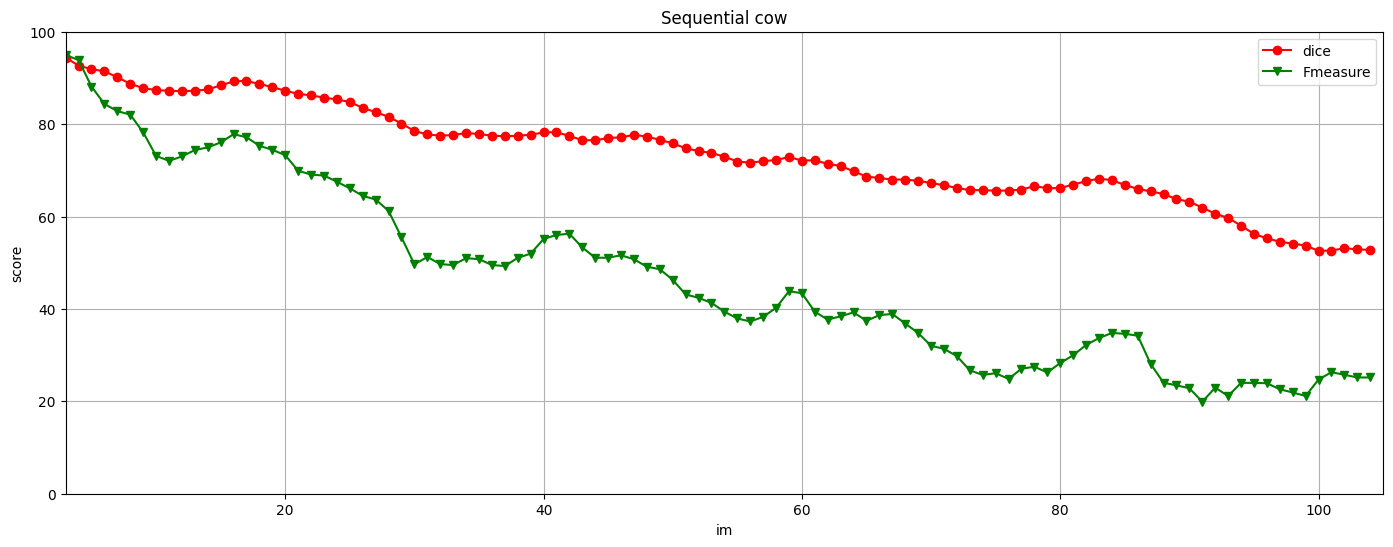

fish


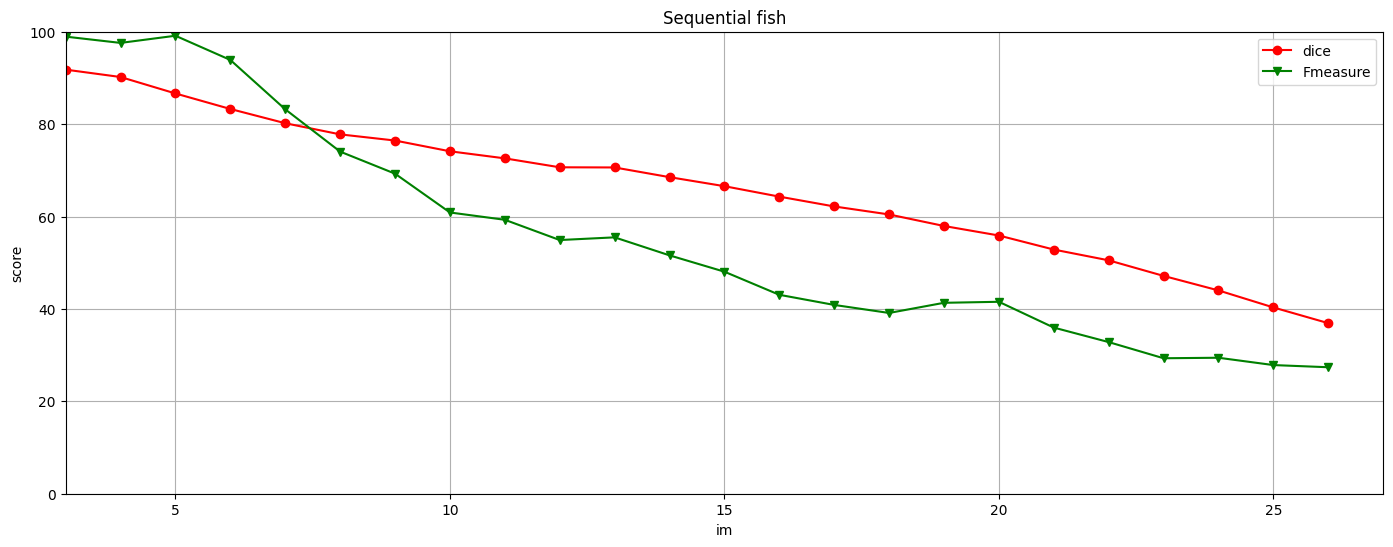

octopus


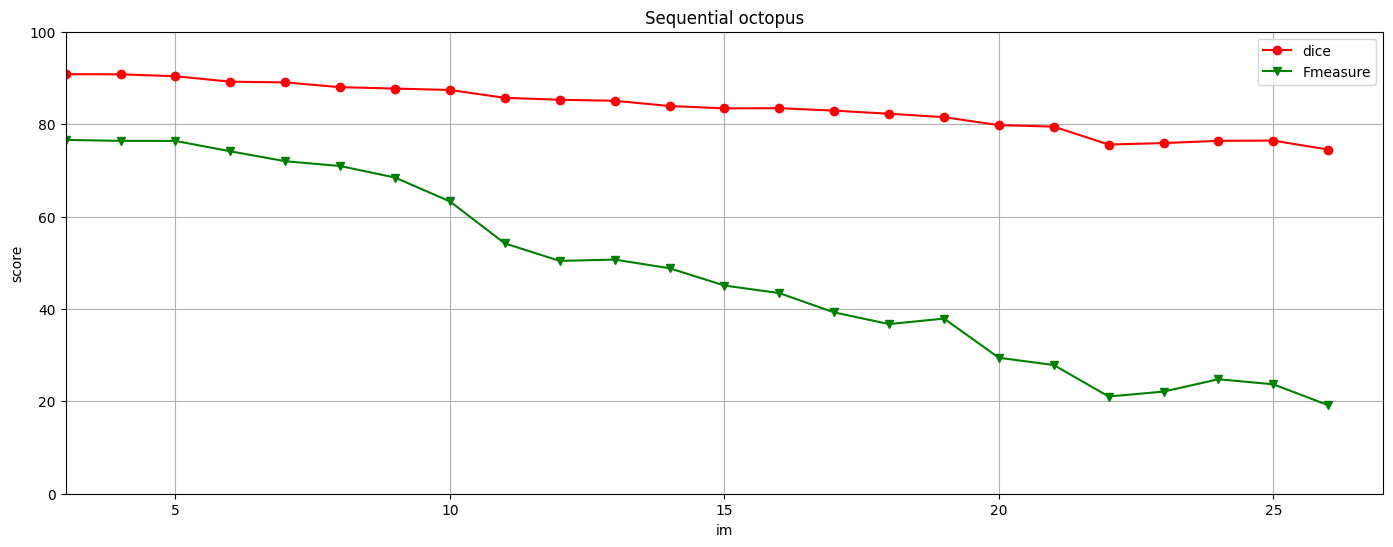

In [19]:
# Results sequential

name =['cow', 'fish', 'octopus']


for i in range(len(name)):
    file_path_dice ="./results/"+name[i] +"-dice_seq.npy"
    file_path_fmeasures ="./results/"+name[i] +"-fmeasures_seq.npy"

    sequence_files = [f for f in os.listdir('sequences-test') if f.startswith(name[i]) and f.endswith(".bmp")]
    nb_start = 1
    nb_end = len(sequence_files)

    loaded_array_dice = np.load(file_path_dice)
    loaded_array_fmeasure = np.load(file_path_fmeasures)

    x = range(nb_start+1,nb_end+1)
    print(name[i])
    fig, ax = plt.subplots(figsize=(17, 6))
    ax.set_title("Sequential " + name[i])
    ax.plot(x,loaded_array_dice,marker='o',color='r')
    ax.plot(x,loaded_array_fmeasure,marker='v',color='g')
    ax.set_xlim((nb_start+1+1,nb_end+1))
    ax.set_ylim((0,100))
    ax.set_ylabel('score')
    ax.set_xlabel("im")
    ax.grid()
    ax.legend(['dice', 'Fmeasure'])
    plt.savefig('results_' + name[i] +'.png')
    plt.show()

### Direct

cow


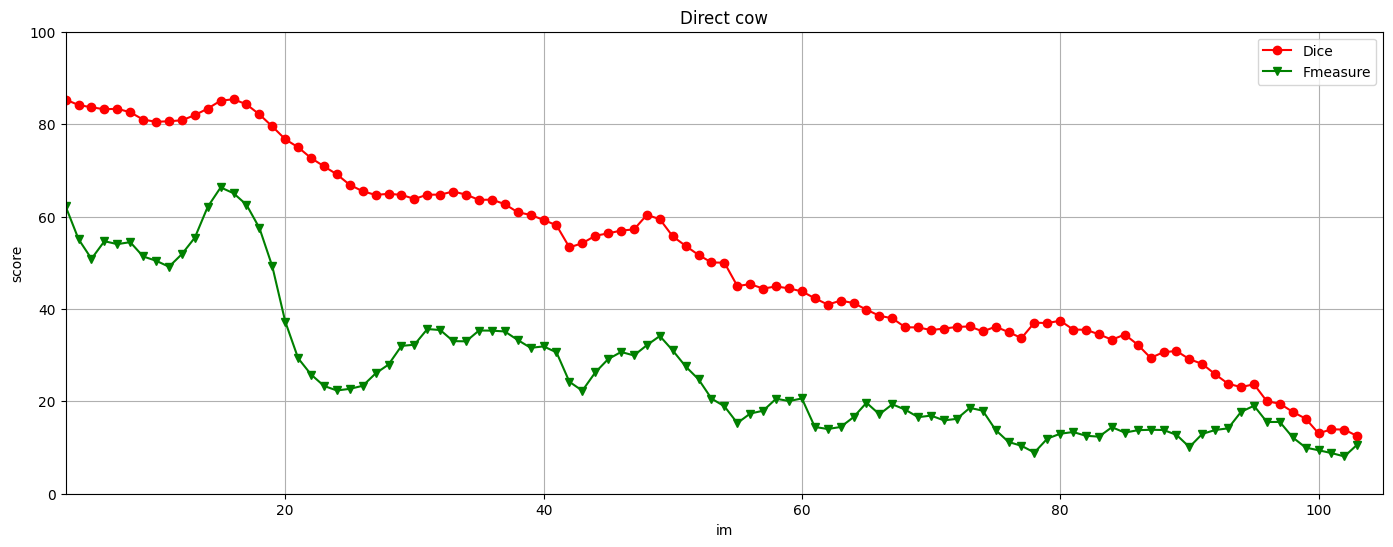

fish


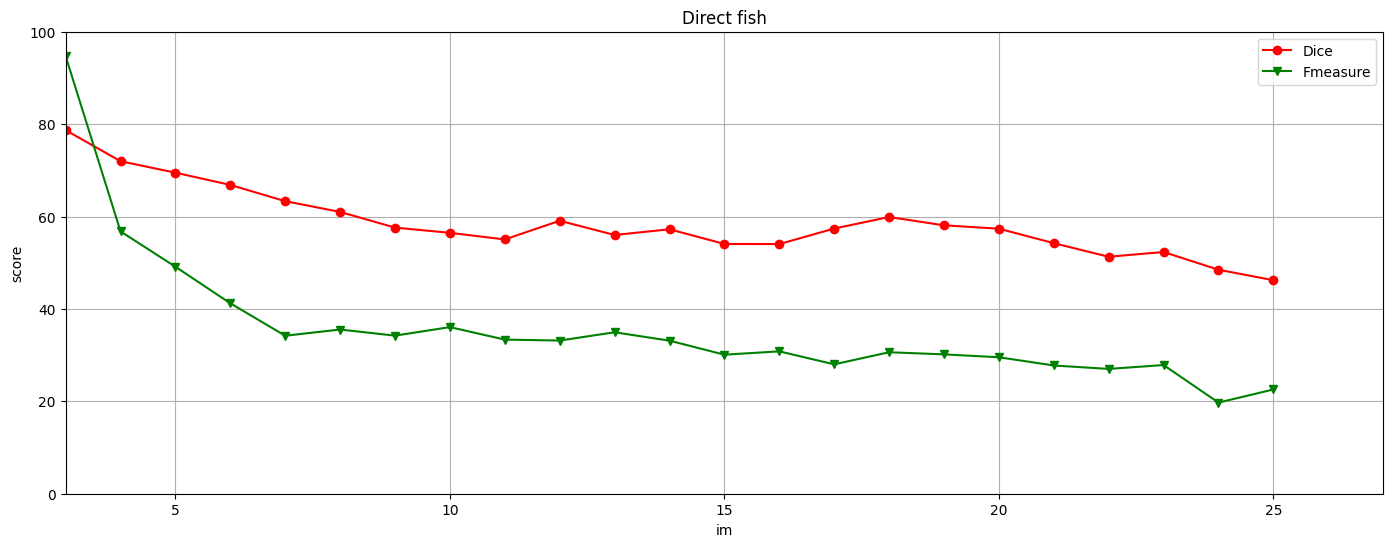

octopus


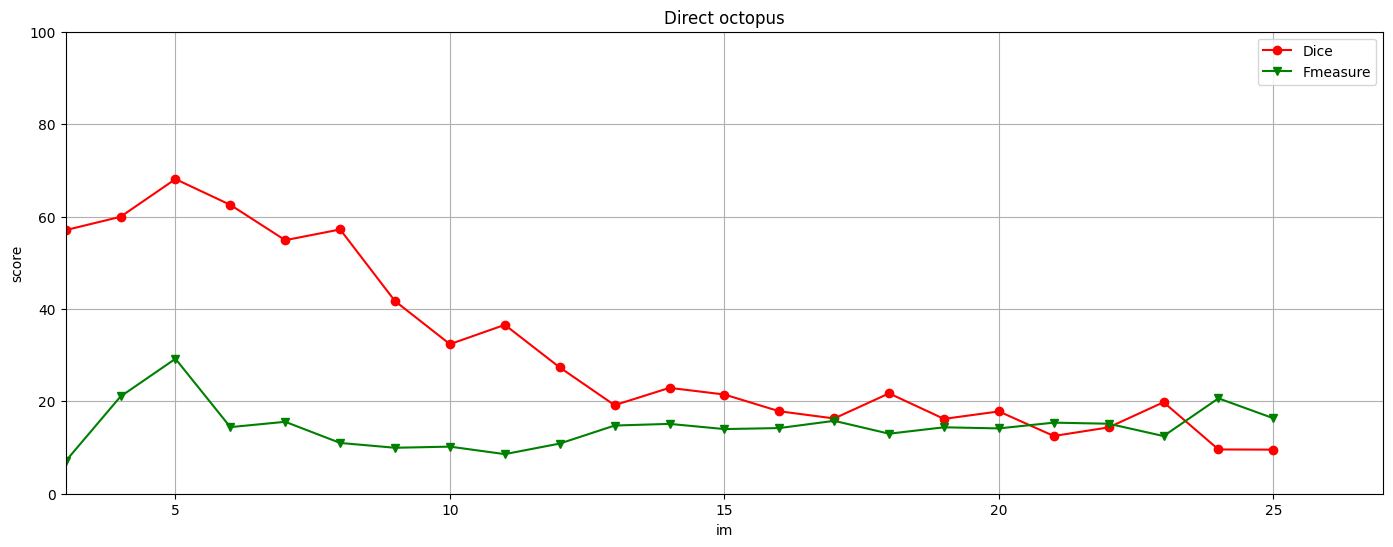

In [20]:
name =['cow', 'fish', 'octopus']

for i in range(len(name)):
    file_path_dice ="./results/"+name[i] +"-dice_dir.npy"
    file_path_fmeasures ="./results/"+name[i] +"-fmeasures_dir.npy"
    sequence_files = [f for f in os.listdir('sequences-test') if f.startswith(name[i]) and f.endswith(".bmp")]
    nb_start = 1
    nb_end = len(sequence_files)

    loaded_array_dice = np.load(file_path_dice)
    loaded_array_fmeasure = np.load(file_path_fmeasures)

    x = range(nb_start,nb_end)
    print(name[i])
    fig, ax = plt.subplots(figsize=(17, 6))
    ax.set_title("Direct " + name[i])
    ax.plot(x,loaded_array_dice,marker='o',color='r')
    ax.plot(x,loaded_array_fmeasure,marker='v',color='g')
    ax.set_xlim((nb_start+1+1,nb_end+1))
    ax.set_ylim((0,100))
    ax.set_ylabel('score')
    ax.set_xlabel("im")
    ax.grid()
    ax.legend(['Dice', 'Fmeasure'])
    plt.savefig('results_' + name[i] +'.png')
    plt.show()

### Direct x Sequential

cow


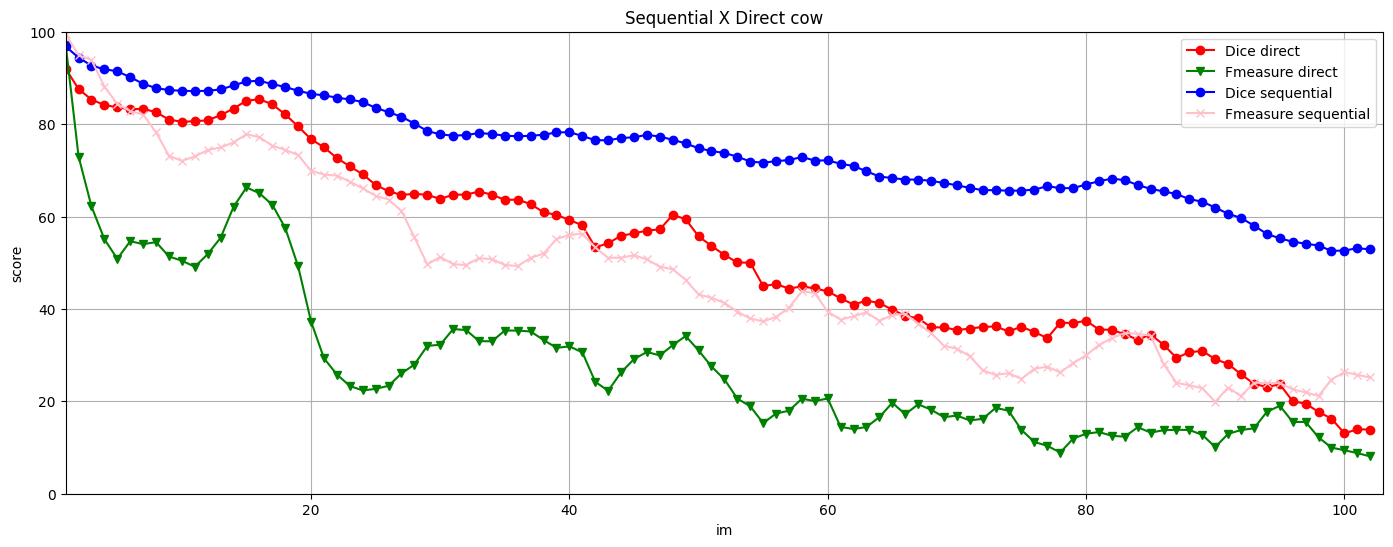

fish


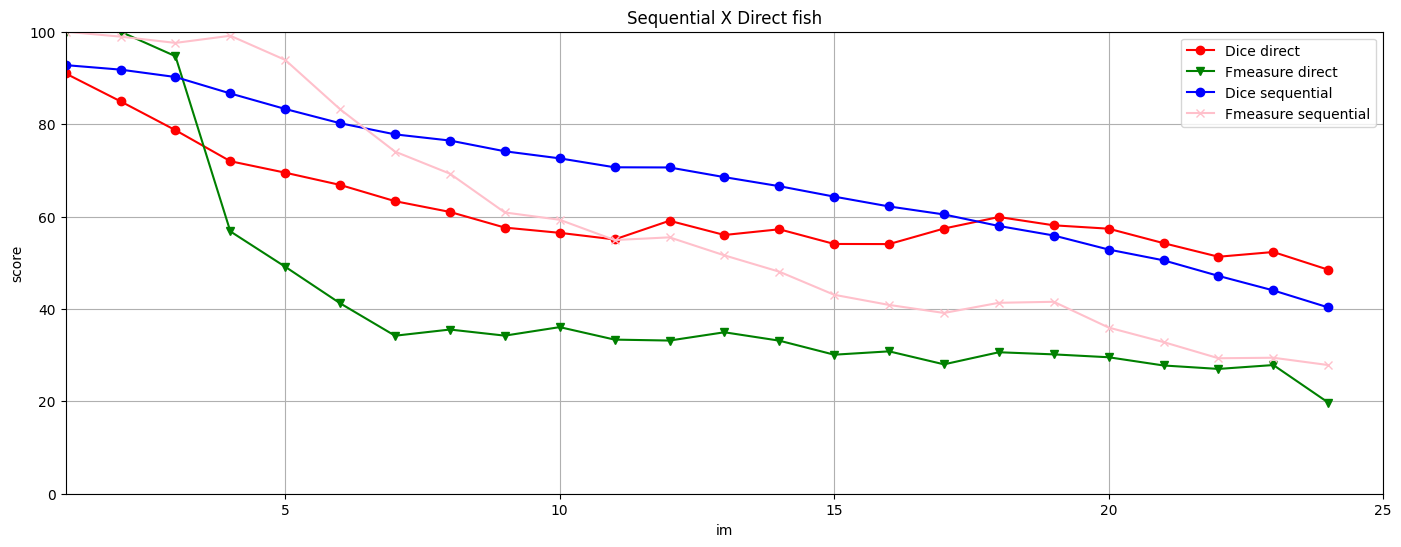

octopus


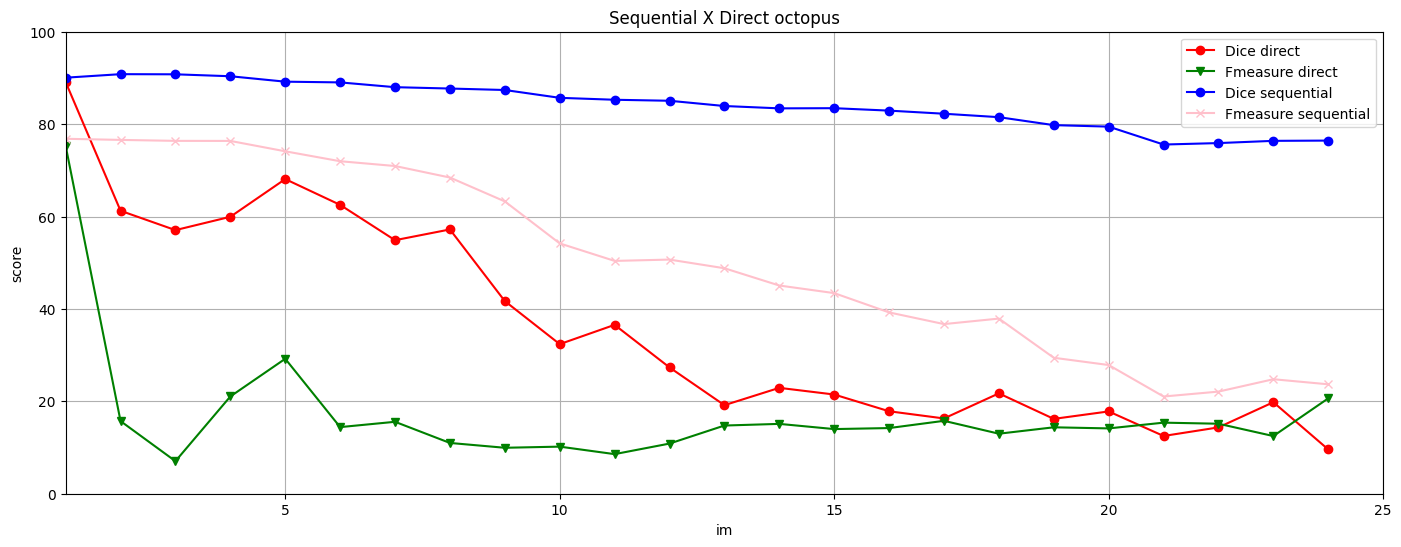

In [23]:
name =['cow', 'fish', 'octopus']

for i in range(len(name)):

    sequence_files = [f for f in os.listdir('sequences-test') if f.startswith(name[i]) and f.endswith(".bmp")]
    nb_start = 1
    nb_end = len(sequence_files)

    # direct 
    file_path_dice_d ="./results/"+name[i] +"-dice_dir.npy"
    file_path_fmeasures_d ="./results/"+name[i] +"-fmeasures_dir.npy"

    loaded_array_dice_d = np.load(file_path_dice_d)
    loaded_array_fmeasure_d = np.load(file_path_fmeasures_d)

    print(name[i])
  

    # sequential
    file_path_dice_s     ="./results/"+name[i] +"-dice_seq.npy"
    file_path_fmeasures_s ="./results/"+name[i] +"-fmeasures_seq.npy"

    loaded_array_dice_s = np.load(file_path_dice_s)[:-1]
    loaded_array_fmeasure_s = np.load(file_path_fmeasures_s)[:-1]

    loaded_array_dice_d = np.delete(loaded_array_dice_d, -1)
    loaded_array_fmeasure_d = np.delete(loaded_array_fmeasure_d, -1)

    x = range(nb_start,nb_end-1)
    # print(name[i])
    # print(x)
    fig, ax = plt.subplots(figsize=(17, 6))
    ax.set_title("Sequential X Direct " + name[i])
    ax.plot(x,loaded_array_dice_d,marker='o',color='r')
    ax.plot(x,loaded_array_fmeasure_d,marker='v',color='g')

    ax.plot(x,loaded_array_dice_s,marker='o',color='b')
    ax.plot(x,loaded_array_fmeasure_s,marker='x',color='pink')
    

    ax.set_xlim((nb_start,nb_end-1))
    ax.set_ylim((0,100))
    ax.set_ylabel('score')
    ax.set_xlabel("im")
    ax.grid()
    ax.legend(['Dice direct', 'Fmeasure direct ', 'Dice sequential ', 'Fmeasure sequential'])
    plt.savefig('results_total_' + name[i] +'.png')
    plt.show()
